In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)


2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:04:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []



processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_class_task = AlluClassTask(processor,
                                "./allusion_corpus",
                                poem_seq_len)
task_list.append(allu_class_task)







Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:04:00.0, compute capability: 7.5



In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()


I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-03-12_20_21/0/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1813 samples, validate on 321 samples


Epoch 1/50
29/29 [==============================] - 151s 5s/step - task_name: ALLU_CLASS  - loss: 2.2928 - accuracy: 0.2667 - val_loss: 2.5714 - val_accuracy: 0.3203


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
29/29 [==============================] - 58s 2s/step - task_name: ALLU_CLASS  - loss: 1.8743 - accuracy: 0.3777 - val_loss: 2.4564 - val_accuracy: 0.3359


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
29/29 [==============================] - 60s 2s/step - task_name: ALLU_CLASS  - loss: 1.6207 - accuracy: 0.4467 - val_loss: 2.4437 - val_accuracy: 0.3281


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
29/29 [==============================] - 7s 239ms/step - task_name: ALLU_CLASS  - loss: 1.3959 - accuracy: 0.5307 - val_loss: 2.5020 - val_accuracy: 0.33070 - ac


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
29/29 [==============================] - 6s 210ms/step - task_name: ALLU_CLASS  - loss: 1.2546 - accuracy: 0.5776 - val_loss: 2.5539 - val_accuracy: 0.3333


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
29/29 [==============================] - 6s 203ms/step - task_name: ALLU_CLASS  - loss: 1.0932 - accuracy: 0.6395 - val_loss: 2.6670 - val_accuracy: 0.3021


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
29/29 [==============================] - 6s 207ms/step - task_name: ALLU_CLASS  - loss: 1.7906 - accuracy: 0.4240 - val_loss: 2.9697 - val_accuracy: 0.2370


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
29/29 [==============================] - 7s 238ms/step - task_name: ALLU_CLASS  - loss: 2.4859 - accuracy: 0.1940 - val_loss: 2.8928 - val_accuracy: 0.1719


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
28/29 [===========================>..] - ETA: 0s - task_name: ALLU_CLASS  - loss: 2.2766 - accuracy: 0.2243
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
29/29 [==============================] - 8s 267ms/step - task_name: ALLU_CLASS  - loss: 2.4140 - accuracy: 0.2214 - val_loss: 2.8300 - val_accuracy: 0.2370


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
29/29 [==============================] - 7s 257ms/step - task_name: ALLU_CLASS  - loss: 2.3967 - accuracy: 0.2053 - val_loss: 2.8120 - val_accuracy: 0.2370


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.3446       534
   macro avg     0.3582    0.2543    0.2564       534
weighted avg     0.3559    0.3446    0.3180       534


epoch:classification EPOCH accuracy: 0.3445692883895131 precision: 0.358156, recall: 0.254267, f1: 0.256377

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:廿 年 别 绪 联 床 雨 ， 四 海 虚 名 满 鬓 霜 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:天文部
----------
x_seq:共 言 愁 是 酌 离 杯 ， 况 值 弦 歌 枉 大 才 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:文明部
----------
x_seq:发 时 正 许 沙 鸥 送 ， 到 日 方 乘 竹 马 迎 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:政事部
----------
x_seq:绍 述 政 行 皆 铁 案 ， 党 人 狱 起 又 黄 巾 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:政事部
----------
x_seq:官 曹 三 语 椽 ， 国 器 万 寻 帧 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:人物部
----------
x_seq:慷 慨 桓 野 王 ， 哀 歌 和 清 谈 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:深 隐

I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-03-12_20_21/1/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1813 samples, validate on 321 samples


Epoch 1/50
29/29 [==============================] - 42s 1s/step - task_name: ALLU_CLASS  - loss: 2.3297 - accuracy: 0.2532 - val_loss: 2.4789 - val_accuracy: 0.3151


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
29/29 [==============================] - 43s 1s/step - task_name: ALLU_CLASS  - loss: 1.9471 - accuracy: 0.3696 - val_loss: 2.3091 - val_accuracy: 0.3646


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
29/29 [==============================] - 20s 698ms/step - task_name: ALLU_CLASS  - loss: 1.6924 - accuracy: 0.4510 - val_loss: 2.2465 - val_accuracy: 0.3516


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
29/29 [==============================] - 22s 754ms/step - task_name: ALLU_CLASS  - loss: 1.5426 - accuracy: 0.4914 - val_loss: 2.1970 - val_accuracy: 0.3620


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
29/29 [==============================] - 7s 244ms/step - task_name: ALLU_CLASS  - loss: 1.3764 - accuracy: 0.5302 - val_loss: 2.2369 - val_accuracy: 0.3646


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
29/29 [==============================] - 8s 265ms/step - task_name: ALLU_CLASS  - loss: 1.2461 - accuracy: 0.5760 - val_loss: 2.2562 - val_accuracy: 0.3750


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
29/29 [==============================] - 7s 232ms/step - task_name: ALLU_CLASS  - loss: 1.0770 - accuracy: 0.6579 - val_loss: 2.3344 - val_accuracy: 0.3906


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
29/29 [==============================] - 6s 207ms/step - task_name: ALLU_CLASS  - loss: 0.9440 - accuracy: 0.6880 - val_loss: 2.3814 - val_accuracy: 0.3854


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
29/29 [==============================] - 7s 246ms/step - task_name: ALLU_CLASS  - loss: 0.8079 - accuracy: 0.7500 - val_loss: 2.4981 - val_accuracy: 0.3750


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
29/29 [==============================] - 8s 270ms/step - task_name: ALLU_CLASS  - loss: 0.7002 - accuracy: 0.7802 - val_loss: 2.5588 - val_accuracy: 0.3802


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
29/29 [==============================] - 7s 258ms/step - task_name: ALLU_CLASS  - loss: 0.5828 - accuracy: 0.8405 - val_loss: 2.7033 - val_accuracy: 0.3646


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.3633       534
   macro avg     0.3724    0.2892    0.3037       534
weighted avg     0.3882    0.3633    0.3500       534


epoch:classification EPOCH accuracy: 0.36329588014981273 precision: 0.372450, recall: 0.289158, f1: 0.303708

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches


train_example:**************************************************
x_seq:望 夫 身 化 石 ， 为 伯 首 如 蓬 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:地理部
y_true:地理部
----------
x_seq:即 事 须 尝 胆 ， 苍 生 可 察 眉 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人体部
y_true:人事部
----------
x_seq:六 经 依 旧 垂 天 地 ， 千 载 秦 灰 散 劫 空 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:地理部
y_true:地理部
----------
x_seq:无 因 [UNK] 投 壁 ， 有 味 倒 餐 蔗 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:植物部
y_true:植物部
----------
x_seq:使 君 不 复 怜 乌 攫 ， 属 国 方 将 掘 鼠 余 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:人事部
----------
x_seq:卖 剑 买 牛 吾 欲 老 ， 杀 鸡 为 黍 子 来 无 ？ [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:政事部


I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-03-12_20_21/2/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1813 samples, validate on 321 samples


Epoch 1/50
29/29 [==============================] - 52s 2s/step - task_name: ALLU_CLASS  - loss: 2.3128 - accuracy: 0.2705 - val_loss: 2.5712 - val_accuracy: 0.2760


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
29/29 [==============================] - 34s 1s/step - task_name: ALLU_CLASS  - loss: 1.9401 - accuracy: 0.3793 - val_loss: 2.4239 - val_accuracy: 0.3177


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
29/29 [==============================] - 27s 914ms/step - task_name: ALLU_CLASS  - loss: 1.7026 - accuracy: 0.4246 - val_loss: 2.3665 - val_accuracy: 0.3359


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
29/29 [==============================] - 8s 281ms/step - task_name: ALLU_CLASS  - loss: 1.5167 - accuracy: 0.4957 - val_loss: 2.3879 - val_accuracy: 0.3385


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
29/29 [==============================] - 8s 265ms/step - task_name: ALLU_CLASS  - loss: 1.3609 - accuracy: 0.5523 - val_loss: 2.4442 - val_accuracy: 0.3385


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
29/29 [==============================] - 8s 268ms/step - task_name: ALLU_CLASS  - loss: 1.2535 - accuracy: 0.5814 - val_loss: 2.4739 - val_accuracy: 0.3255


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
29/29 [==============================] - 8s 267ms/step - task_name: ALLU_CLASS  - loss: 1.0825 - accuracy: 0.6519 - val_loss: 2.5521 - val_accuracy: 0.3073


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
29/29 [==============================] - 8s 266ms/step - task_name: ALLU_CLASS  - loss: 0.9466 - accuracy: 0.7015 - val_loss: 2.6665 - val_accuracy: 0.3229


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
29/29 [==============================] - 6s 222ms/step - task_name: ALLU_CLASS  - loss: 0.7920 - accuracy: 0.7613 - val_loss: 2.7170 - val_accuracy: 0.3203


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
29/29 [==============================] - 6s 218ms/step - task_name: ALLU_CLASS  - loss: 0.7073 - accuracy: 0.8044 - val_loss: 2.8691 - val_accuracy: 0.3229


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.4026       534
   macro avg     0.3321    0.2780    0.2760       534
weighted avg     0.3911    0.4026    0.3734       534


epoch:classification EPOCH accuracy: 0.40262172284644193 precision: 0.332056, recall: 0.277972, f1: 0.275956

-----------------------------ALLU_CLASS END ----------------------------
train_example:**************************************************
x_seq:开 窗 逢 一 笑 ， 未 觉 徐 娘 老 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:疑 惑 樽 中 弩 ， 淹 留 冠 上 簪 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:武备部
----------
x_seq:脱 靴 力 士 只 羞 颜 ， 捧 砚 杨 妃 劳 玉 脂 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches


test_example:**************************************************
x_seq:天 山 自 可 三 箭 取 ， 海 国 何 劳 一 苇 航 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:地理部
y_true:武备部
----------
x_seq:宁 戚 饭 牛 图 底 事 ， 陆 通 歌 风 也 无 端 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:文明部
y_true:人事部
----------
x_seq:极 德 难 忘 寸 草 私 ， 多 愁 长 废 蓼 莪 诗 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:文明部
y_true:文明部
----------
x_seq:马 援 征 行 在 眼 前 ， 葛 强 亲 近 同 心 事 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人物部
----------
x_seq:犹 嫌 子 夏 儒 ， 肯 学 樊 迟 稼 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:我 以 一 箭 书 ， 能 取 聊 城 功 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:文明部
y_true:武备部
----------
x_seq:功 名 

I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-03-12_20_21/3/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1814 samples, validate on 321 samples


Epoch 1/50
29/29 [==============================] - 43s 1s/step - task_name: ALLU_CLASS  - loss: 2.2947 - accuracy: 0.2592 - val_loss: 2.5730 - val_accuracy: 0.2734


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
29/29 [==============================] - 7s 254ms/step - task_name: ALLU_CLASS  - loss: 1.9853 - accuracy: 0.3648 - val_loss: 2.6855 - val_accuracy: 0.2448


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
29/29 [==============================] - 14s 487ms/step - task_name: ALLU_CLASS  - loss: 1.7287 - accuracy: 0.4251 - val_loss: 2.3082 - val_accuracy: 0.3359


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
29/29 [==============================] - 13s 462ms/step - task_name: ALLU_CLASS  - loss: 1.5387 - accuracy: 0.4898 - val_loss: 2.2991 - val_accuracy: 0.3594


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
29/29 [==============================] - 8s 269ms/step - task_name: ALLU_CLASS  - loss: 1.3590 - accuracy: 0.5420 - val_loss: 2.3092 - val_accuracy: 0.3490


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
29/29 [==============================] - 7s 237ms/step - task_name: ALLU_CLASS  - loss: 1.1937 - accuracy: 0.6121 - val_loss: 2.3169 - val_accuracy: 0.3359


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
29/29 [==============================] - 6s 221ms/step - task_name: ALLU_CLASS  - loss: 1.0772 - accuracy: 0.6541 - val_loss: 2.3897 - val_accuracy: 0.3411


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
29/29 [==============================] - 8s 263ms/step - task_name: ALLU_CLASS  - loss: 0.9510 - accuracy: 0.6902 - val_loss: 2.4930 - val_accuracy: 0.3464


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
29/29 [==============================] - 7s 249ms/step - task_name: ALLU_CLASS  - loss: 0.8238 - accuracy: 0.7457 - val_loss: 2.5870 - val_accuracy: 0.3542


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
29/29 [==============================] - 6s 202ms/step - task_name: ALLU_CLASS  - loss: 0.7264 - accuracy: 0.7807 - val_loss: 2.6482 - val_accuracy: 0.3568


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
29/29 [==============================] - 6s 216ms/step - task_name: ALLU_CLASS  - loss: 0.6271 - accuracy: 0.8179 - val_loss: 2.7806 - val_accuracy: 0.3464


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.3996       533
   macro avg     0.4208    0.2923    0.3094       533
weighted avg     0.4134    0.3996    0.3740       533


epoch:classification EPOCH accuracy: 0.399624765478424 precision: 0.420770, recall: 0.292317, f1: 0.309366

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:天 边 鸿 鹊 不 易 得 ， 便 令 作 对 随 家 鸡 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:动物部
----------
x_seq:嫦 娥 窃 药 出 人 间 ， 藏 在 蟾 宫 不 放 还 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:九流部
y_true:天文部
----------
x_seq:羿 焉 [UNK] 日 ， 乌 焉 解 羽 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:天文部
y_true:天文部
----------
x_seq:骥 服 盐 车 不 称 情 ， 轻 裘 肥 马 凤 凰 城 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:士 节 久 调 丧 ， 舐 痔 甜 不 求 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:张 良 思 报 韩 ， 龚 胜 耻 事 新 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_t

I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-03-12_20_21/4/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1814 samples, validate on 321 samples


Epoch 1/50
29/29 [==============================] - 38s 1s/step - task_name: ALLU_CLASS  - loss: 2.3572 - accuracy: 0.2355 - val_loss: 2.6117 - val_accuracy: 0.2526


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
29/29 [==============================] - 18s 615ms/step - task_name: ALLU_CLASS  - loss: 2.0837 - accuracy: 0.3168 - val_loss: 2.4933 - val_accuracy: 0.3047


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
29/29 [==============================] - 26s 893ms/step - task_name: ALLU_CLASS  - loss: 1.8909 - accuracy: 0.3723 - val_loss: 2.3462 - val_accuracy: 0.3542


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
29/29 [==============================] - 18s 638ms/step - task_name: ALLU_CLASS  - loss: 1.7096 - accuracy: 0.4300 - val_loss: 2.3378 - val_accuracy: 0.3464


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
29/29 [==============================] - 6s 202ms/step - task_name: ALLU_CLASS  - loss: 1.5102 - accuracy: 0.4844 - val_loss: 2.3428 - val_accuracy: 0.3411


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
29/29 [==============================] - 7s 235ms/step - task_name: ALLU_CLASS  - loss: 1.3549 - accuracy: 0.5501 - val_loss: 2.3800 - val_accuracy: 0.3385


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
29/29 [==============================] - 8s 267ms/step - task_name: ALLU_CLASS  - loss: 1.2103 - accuracy: 0.6018 - val_loss: 2.5062 - val_accuracy: 0.3151


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
29/29 [==============================] - 7s 240ms/step - task_name: ALLU_CLASS  - loss: 1.0674 - accuracy: 0.6536 - val_loss: 2.5875 - val_accuracy: 0.3203


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
29/29 [==============================] - 6s 203ms/step - task_name: ALLU_CLASS  - loss: 0.9302 - accuracy: 0.7064 - val_loss: 2.7285 - val_accuracy: 0.3021


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
29/29 [==============================] - 7s 246ms/step - task_name: ALLU_CLASS  - loss: 0.8280 - accuracy: 0.7344 - val_loss: 2.8562 - val_accuracy: 0.3203


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
29/29 [==============================] - 8s 278ms/step - task_name: ALLU_CLASS  - loss: 0.7580 - accuracy: 0.7565 - val_loss: 2.7988 - val_accuracy: 0.3099


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.3302       533
   macro avg     0.2957    0.2230    0.2361       533
weighted avg     0.3276    0.3302    0.3054       533


epoch:classification EPOCH accuracy: 0.3302063789868668 precision: 0.295691, recall: 0.223048, f1: 0.236074

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:惟 君 知 我 苦 ， 何 异 [UNK] 桐 鸣 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:陶 潜 政 事 千 杯 酒 ， 张 翰 生 涯 一 叶 舟 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:煮 豆 燃 萁 谁 管 得 ， 莫 将 成 败 论 英 雄 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:植物部
----------
x_seq:题 桥 一 字 终 何 益 ， 卖 赋 千 金 竟 或 无 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:器用部
----------
x_seq:恐 是 叶 公 好 假 龙 ， 及 见 真 龙 却 惊 怕 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:人物部
----------
x_seq:白 眉 年 少 未 弱 冠 ， 落 纸 纷 纷 运 纤 腕 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人体部
y_true:人体部
----------
x_seq:雨 垫 林 宗 巾 ， 风 落

In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.ALLU_CLASS	[0.36806361 0.35582475 0.26735222 0.27629607]



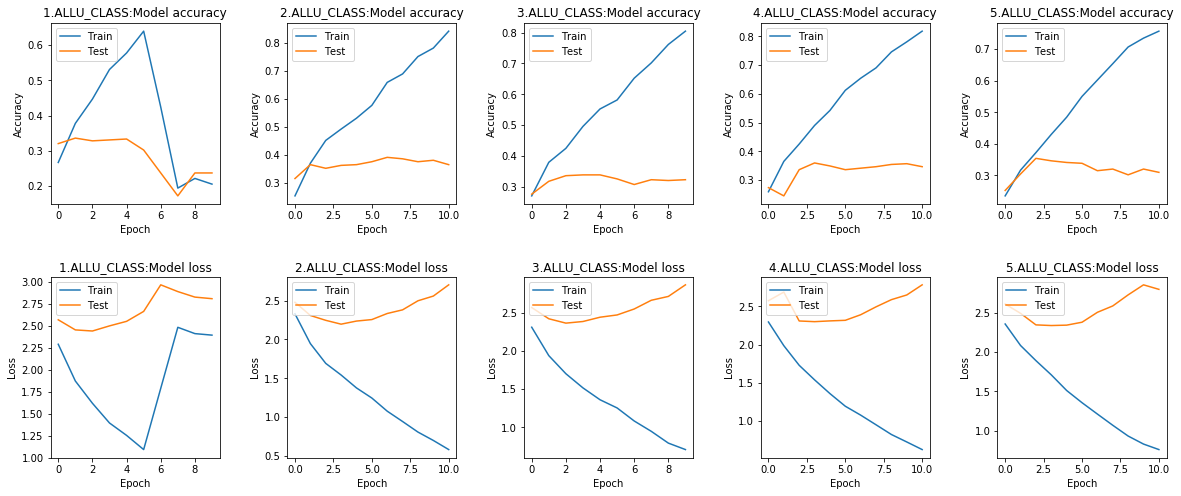

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)